<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/Knearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl 
import scipy
from scipy.spatial.distance import cdist #pacchetto di metriche di distanze, cidist calcola la distanza tra un puunto e tutti gli altri 


In [ ]:
np.random.seed(420)
data = np.random.randn(100,2)
label = np.random.randint(0,2,100)
testparticle = np.random.randn(2)


Text(0.5, 1.0, 'Feature Space')

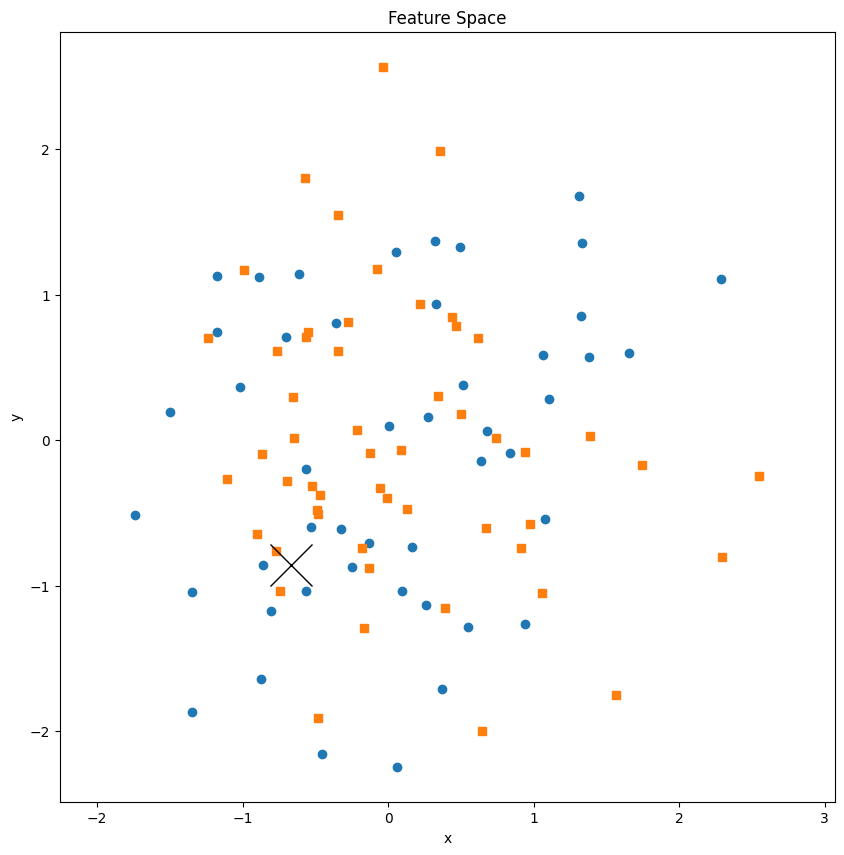

In [ ]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis("equal");

ax.plot(data[:,0][label==0],data[:,1][label==0],'o')
ax.plot(data[:,0][label==1],data[:,1][label==1],'s')
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Feature Space")

In [ ]:
#inizio con il Knearest, userò cdist

d = cdist(np.atleast_2d(testparticle),data)
#ritorna la distanza euclidea tra la mia test particle e tutti gli altri punti 

In [ ]:
np.argmin(d) #ritorna la posizione del valore più piccolo di d
np.min(d), d[:,np.argmin(d)]

(0.14046654795520722, array([0.14046655]))

Caso K=1


In [ ]:
k=1
labeltest = label[np.argmin(d)]
#quello che voglio ottenere

<ipython-input-34-af01939d5960>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest])


Text(0.5, 1.0, 'Feature Space')

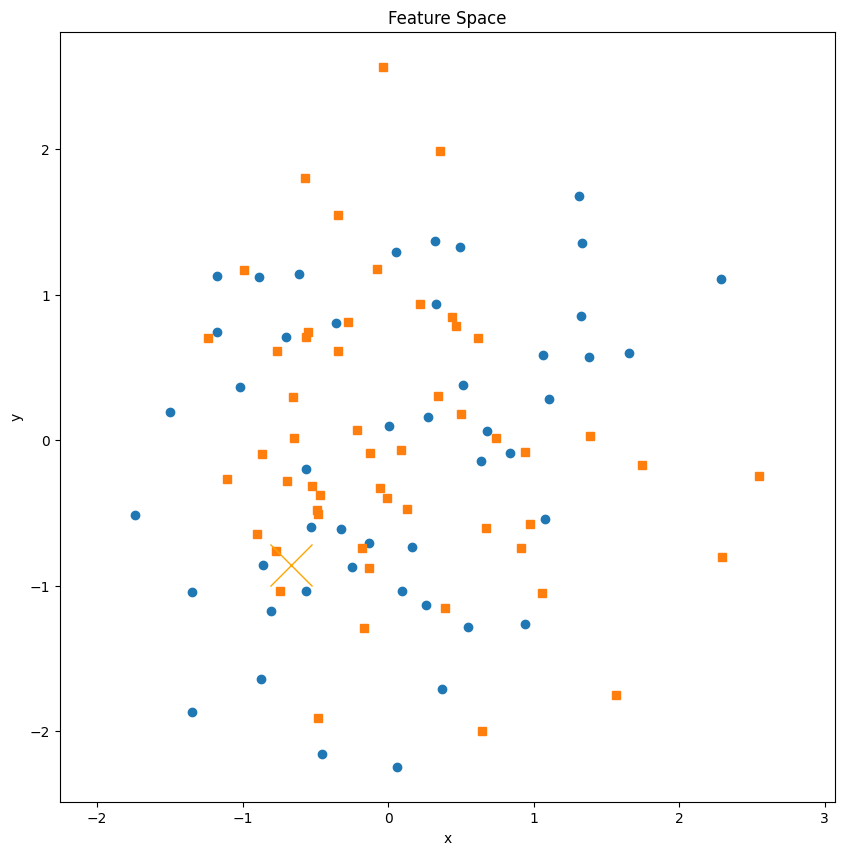

In [ ]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis("equal");

colors=["blue","orange"] #importante, le metto nell'ordine giusto, label 0 è blue label 1 è orange
ax.plot(data[:,0][label==0],data[:,1][label==0],'o')
ax.plot(data[:,0][label==1],data[:,1][label==1],'s')
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Feature Space")

Caso K=5

In [ ]:
k=5
#nns = nearest neighbors
nns=data[np.argsort(d)][0,:k]#ritorna un array di indici ordinati sulla base della dimensione di d, ne prendo i primi k elementi
nns

array([[-0.76813595, -0.76311794],
       [-0.74683708, -1.03867392],
       [-0.86330093, -0.85526903],
       [-0.56196398, -1.03443857],
       [-0.52965621, -0.59603401]])

In [ ]:
nnslabel = label[np.argsort(d)][0,:k]
nnslabel

3

In [ ]:
labeltest2 = 0 if (nnslabel ==0).sum()>(nnslabel==1).sum() else 1
#If su una sola riga, do 0 se ho più zeri che 1
#(nnslabel ==0).sum() fa il conteggio degli elementi che sono 0 in quell'array
labeltest2

0

<ipython-input-46-a34944dba1dd>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest2])


Text(0.5, 1.0, 'Feature Space')

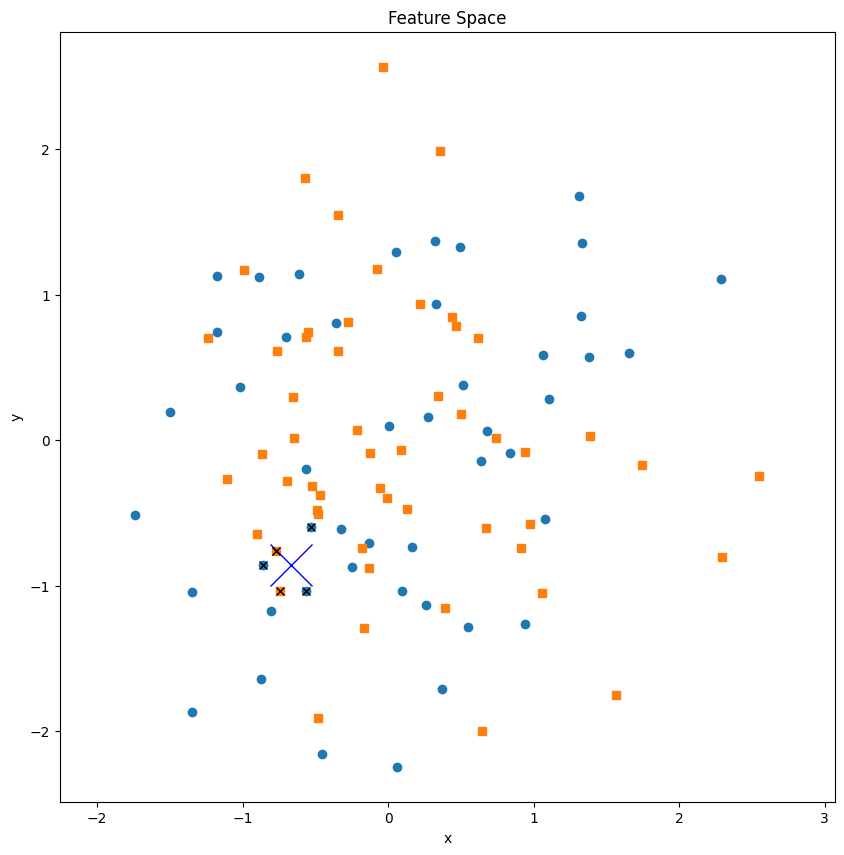

In [ ]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis("equal");

colors=["blue","orange"] #importante, le metto nell'ordine giusto, label 0 è blue label 1 è orange
ax.plot(data[:,0][label==0],data[:,1][label==0],'o')
ax.plot(data[:,0][label==1],data[:,1][label==1],'s')
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest2])
ax.plot(nns[:,0],nns[:,1], 'kx')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Feature Space")

#Questa volta è blu, perchè ci sono più vicini blu che arancioni

##Commento codice (che sarà su GH)

Intanto connessione tra colab e drive per leggere dati e salvare risultati su Drive, ma volendo posso farlo a mano anche di fianco 
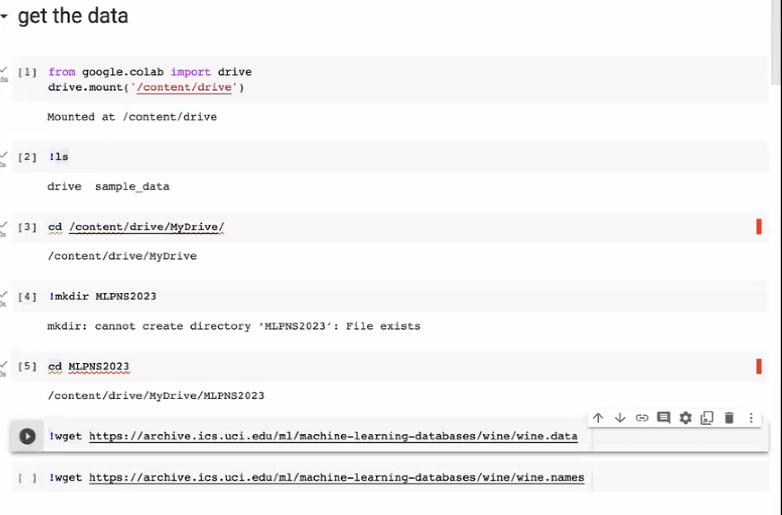



Wget estrae una pagina che esiste nel web, in questo caso pa lagina sono i dati, se fosse l'html mi estrarrebbe l'html



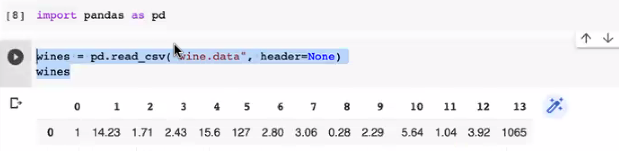


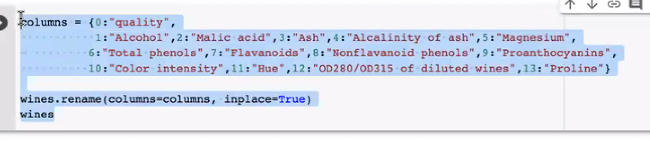


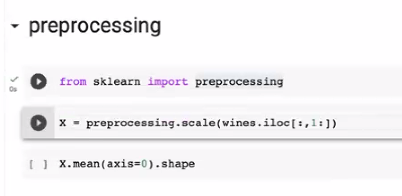


wines.iloc e tralascio la colonna 1 così mantengo inalterata la prima colonna che è quella della qualità


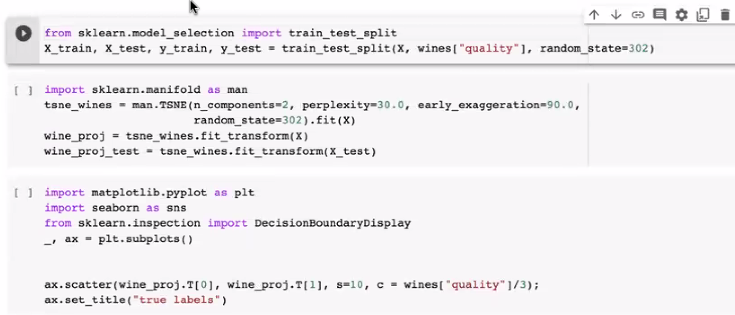



MODELING
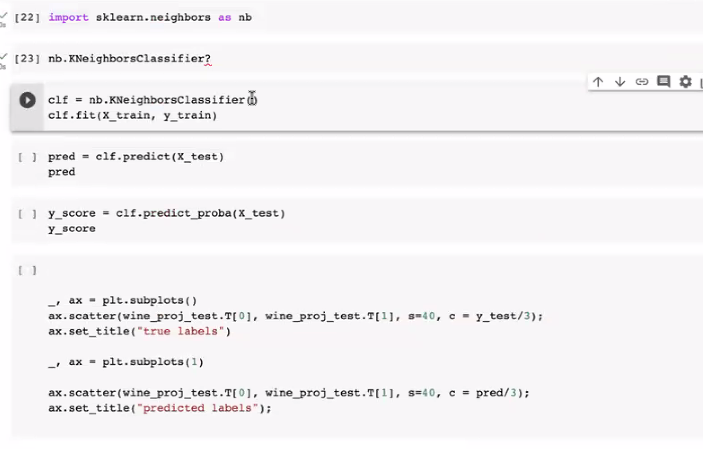


La predizione è deterministica, però potrei anche farlo in modo probabilistico, siccome la abel è stat adeciso sula base di una decisione aggregata delle 5 neighbors posso integrare la popolarità come probabilità che faccia parte di quella categoria (interpreto la frequenza delle labels in modo probabilstico



Cose importanti: 
- sbaglia l'outlier
- confusion matrix, vedo su ogni classe l'accuratezza valutata in termini di test set
